In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.patches as mpatches

# Buat 3 cluster dasar
X, y_true = make_blobs(n_samples=400, centers=3, cluster_std=1.2, random_state=42)

# Modifikasi: rotasi cluster ke-2 agar miring
mask = y_true == 2
angle = np.pi / 4  # 45 derajat
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle),  np.cos(angle)]])
X[mask] = X[mask] @ rotation_matrix.T  # terapkan rotasi

In [3]:
# Inisialisasi dan latih GMM
gmm = GaussianMixture(
    n_components=3,
    covariance_type='full',  # penting: izinkan bentuk elips bebas
    random_state=42
)
gmm.fit(X)

# Prediksi hard label (cluster dominan)
labels = gmm.predict(X)

# Dapatkan probabilitas keanggotaan (soft assignment)
probs = gmm.predict_proba(X)  # shape: (n_samples, n_components)

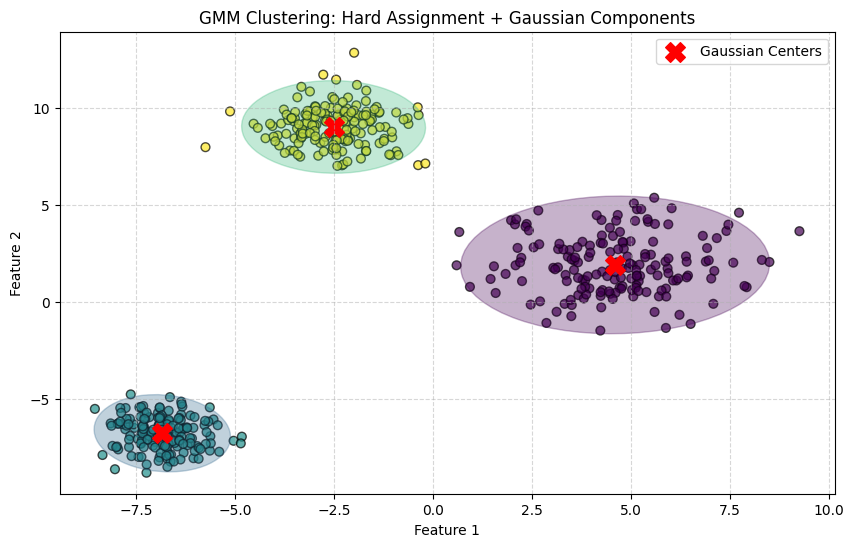

In [4]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Gambar elips berdasarkan mean dan kovarians."""
    from scipy.stats import chi2
    ax = ax or plt.gca()
    
    # Ambang batas untuk mencakup ~95% data (chi-square df=2)
    scale = np.sqrt(chi2.ppf(0.95, df=2))
    
    # Eigen decomposition
    eigvals, eigvecs = np.linalg.eigh(covariance)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    
    # Sumbu utama
    width, height = 2 * scale * np.sqrt(eigvals)
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    
    # Gambar elips
    ellip = mpatches.Ellipse(xy=position, width=width, height=height,
                             angle=angle, **kwargs)
    ax.add_patch(ellip)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40, alpha=0.7, edgecolor='k')

# Tambahkan pusat dan elips
for i in range(gmm.n_components):
    draw_ellipse(gmm.means_[i], gmm.covariances_[i], 
                 alpha=0.3, color=plt.cm.viridis(i / 3))

plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], 
            c='red', marker='X', s=200, label='Gaussian Centers')
plt.title('GMM Clustering: Hard Assignment + Gaussian Components')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [5]:
# Pilih titik di tengah-tengah (misalnya indeks 100)
idx = 100
print(f"Titik {idx}: {X[idx]}")
print(f"Probabilitas keanggotaan ke tiap cluster: {probs[idx]}")
print(f"Cluster dominan: {labels[idx]}")

Titik 100: [4.4793333 0.4203062]
Probabilitas keanggotaan ke tiap cluster: [1.00000000e+00 5.79800003e-80 2.24635586e-28]
Cluster dominan: 0
